# Testing python and Numpy basic skills

This is a series of test problems to assess your skills with simple usage of python and numpy.

**Note:** every place you are expected to complete is marked by an ellipsis: `...`

## Looping and computing: The Pyramid

In this part, we want to estimate the weight of a pyramid of cubic blocks. The top is a 1x1 block, the second layer 2x2, the third 3x3, etc... This is a **3D pyramid**, but below is a **side** view illustration:


```
  Height  __
^       _|__|_
|     _|__||__|_
|   _|__||__||__|_
|  |__||__||__||__| 

```
(Side view of the pyramid.)

Create a **function** that computes the number of blocks required to build the pyramid, with the following *signature*:

```python
    blocks_in_pyramid(height: float, block_side: float) -> int
```

This *signature* represents 3 things:

 - the name of the function is expected to be `blocks_in_pyramid`;
 - its inputs are two arguments : `height` and `block_side` (both of type `float`);
 - its output is an `int`.

Test the function on a 146m high monument, with 1x1x1m blocks and 2.5 tons (similar to those in the Pyramid of Cheops [read more](https://en.wikipedia.org/wiki/Great_Pyramid_of_Giza))

What is the total weight of the pyramid?



In [ ]:
...

nbl = blocks_in_pyramid(146 , 1)

## Creating a function: Population Growth

The world population was 3 682 488 000 in 1970, and 7 349 472 000 in 2015. [read more](https://en.wikipedia.org/wiki/World_population)

- The *birth rate* is the number of births per 1000 persons per year. During the 1970-2015 period, it was about 24.1 births / 1000 person / year. [read more](https://en.wikipedia.org/wiki/Birth_rate)
- The *death rate* is the number of deaths per 1000 persons per year. During the 1970-2015 period, it was about 8.6 births / 1000 person / year. [read more](https://en.wikipedia.org/wiki/Mortality_rate)

Create a **function** that computes the population number after one year. Its signature should be:

```python
    population_update(population_nb: int, birth_rate: float, death_rate: float) -> int
```

Check the result of the function by running it for 45 years to match the world population in 2015.

In [3]:
...

Ellipsis

## Lists and plotting: Exceptional Mortality

The following `exception_death_rate` function computes the exceptional mortality rate (by *e.g.* starvation, disease, or war), according to the signature:

```python
    exception_death_rate(population: int, earth_capital: int) -> float
```

were the `earth_capital` is the amount of ressources extractible from the planet within one year, normalized. One unit of `earth_capital` allows one person to live one year long.

Your tasks for this exercise are to:

 1. Create a list of population values starting from 1000, going to 300000, by steps of 1000.
 2. Create a list of the same size, gathering the exception_death_rate for each population. Use an earth capital of 100000
 3. Plot the exception_death_rate vs population curve, for a population going from 1000 to 300000, with an earth_capital of 100000.

In [18]:
def exception_death_rate(pop, earth_capital):
    max_dr = 500.
    e_dr = max_dr*(pop/earth_capital)**1.3
    e_dr = min(e_dr, max_dr)
    return e_dr

earth_capital = 100000

...

Ellipsis

## Running a small world model: Stop Condition

In the folowing code, change the loop condition in order to stop:

- if the year is over 2200
- if population is under 1000000


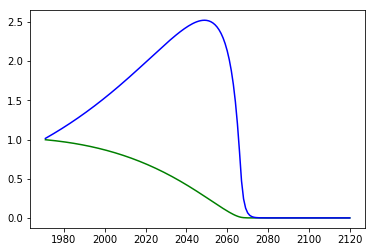

In [53]:
EARTH_CAPITAL_1970 = 500e9
POPULATION_1970 = 3682488000
EARTH_RECOVERY_RATE = 5.

pop = POPULATION_1970
birth_rate = 24.1
death_rate = 8.6
year = 1970
earth_capital = EARTH_CAPITAL_1970

population_list  = []
time = []
earth_capital_list = []
info2 = []

def earth_capital_update(earth_capital, pop):
    earth_capital += -pop + EARTH_RECOVERY_RATE/1000.*earth_capital
    earth_capital = min(earth_capital,EARTH_CAPITAL_1970)
    earth_capital = max(earth_capital, 1.)
    return earth_capital


for i in range(150): # DO YOUR STUFF HERE
    year += 1
    
    ...
    
    earth_capital = earth_capital_update(earth_capital, pop)
    
    e_dr = exception_death_rate(pop, earth_capital)
    
    pop = population_update(pop, birth_rate, death_rate+e_dr)
    
    population_list.append(pop/POPULATION_1970)
    time.append(year)
    earth_capital_list.append(earth_capital/EARTH_CAPITAL_1970)
    

plt.plot(time, earth_capital_list,"g")
plt.plot(time, population_list,"b")

---

# Advection with numpy

In the following section, ou will create asimple advection model ([read more](https://en.wikipedia.org/wiki/Advection)). Imagine a concentration of pollutant convected by the wind.

The advection equation of the scalar $v$ is :

$dv/dt = - c * dv/dx$

To solve this equation, we need the first derivative operator to compute $dv/dx$.



## Create the gradient operator

Let's start by creating the gradient function. It **must** be of **first** order, and not second, because the second order centered gradient would be unstable.

This is similar to the section "Derivation from Taylor's polynomial" from [wikipedia's finite differences page](https://en.wikipedia.org/wiki/Finite_difference_method). The stencil used on wikipedia is *forward*, but please use a *backward* stencil here. In other words, the gradient here :

- is **not** taken to the right of the position ($v_{n+1} - v_{n}$), a.k.a. *forward*.
- is taken **instead** to the left of the position ($v_n - v_{n-1}$), a.k.a. *backward*.

The final operator is expressed as: $dv/dx = (v_n - v_{n-1})/dx$.

Pay attention also to the left border: use a periodic condition, where the flow wraps around to the right side.

Test your function with a cosinus. Its gradient is a sine function.

In [1]:
import numpy as np

def grad1(arr, dx):
    """Compute gradient using FIRST order upwinded difference
    
    out_n = (arr_n - arr_nm1)/dx
    
    """
    out = np.ones_like(arr)
    
    ...
    
    return out

NameError: name 'plt' is not defined

## Initial state

Create the initial state in the following function. The proposed function returns an empty valued array.

Set the following values:

- 0.1 at position 1 
- 0.5 at position 2
- 0.8 at position 3
- 0.9 at position 4
- 0.8 at position 5
- 0.5 at position 6
- 0.1 at position 7

and plot the result.

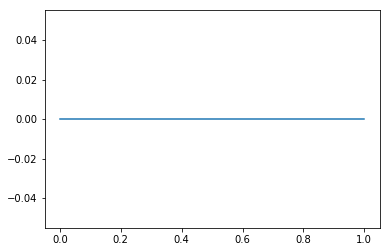

In [37]:
import numpy as np

def create_init_state(size):
    """Create the initial state of computation"""
    x_coor = np.linspace(0.,1., 20)
    val = 0. * x_coor
    
    ...
    
    return x_coor, val

x_coor, val = create_init_state(20)
plt.plot(x_coor, val)

## Advection of the solution

Create the loop solving the advection equation.

$dv/dt = - c * dv/dx$

with a celerity $c$ of 0.1 m/s. The stability citerion is given by the [Courant–Friedrichs–Lewy condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition).

Stop the computation after 10 iterations. Your tasks for this exercise are to:

 1. Plot the result for each time step.
 2. Print the time.
 3. Change the loop to stop the computation after 0.1 s.


In [40]:
...

Ellipsis